In [147]:
import torch
import numpy as np
import torchvision # computer vision package 
import torchvision.transforms as transforms # interface for common IP transforms. 
import torch.nn as nn
import torchvision.transforms as transforms 
torch.set_printoptions(linewidth=120)

In [148]:
# MNIST FASHION

# Extract, transform, load. 
# extract the data from the source
# trasnforms it into a tensor
# load it into an object

# we have two classes built in for this. 

# torch.utils.data.Dataset is the dataset class
# torch.utils.data.DataLoader wraps the data 

# An abstract class is a python class that has a few methods we need to implement

# custom dataset class by extending the dataset class

# example
class OHLC(Dataset):
    def __init__(self, csv_file):
        self.data = pd.read_csv(csv_file)
        
    def __getitem(self, index):
        r = self.data.iloc[index]
        label = torch.tensor(r.is_up_day, dtype=torch.long)
        sample = self.normalize(torch.tensor(r.open, r.high, r.low, r.close))
        
        return sample, label
    
    def __len__(self):
        return len(self.data)

NameError: name 'Dataset' is not defined

In [149]:
# LOAD
train_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    train = True,
    download = True,
    transform = transforms.Compose([ # This is the transform. Easy. 
        transforms.ToTensor() # TRANSFORM
    ])
)

In [150]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size = 100)
# 10 images per batch

In [151]:
type(train_loader)

torch.utils.data.dataloader.DataLoader

In [152]:
# neat. 
# now we have two objects - a dataset object and a dataloader object. 
import numpy as np
import matplotlib.pyplot as plt

torch.set_printoptions(linewidth=120) # just says how much we want it to print out 

train_set.train_labels

/Users/alexquill/anaconda3/lib/python3.6/site-packages/torchvision/datasets/mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([9, 0, 0,  ..., 3, 0, 5])

In [153]:
train_set.train_labels.bincount() # bincount counts the number of elements per label

/Users/alexquill/anaconda3/lib/python3.6/site-packages/torchvision/datasets/mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [154]:
# Balanced across labels! Nice. 
sample = next(iter(train_set))
print(sample)

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039,
          0.0000, 0.0000, 0.0510, 0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039,
      

In [155]:
len(sample)

2

In [156]:
image, label = sample
print(label) # easy enough

9


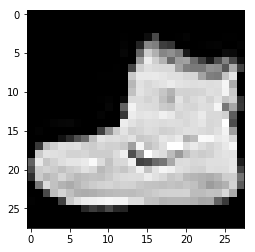

In [157]:
plt.imshow(image.squeeze(), cmap='gray')
plt.show()

In [158]:
batch = next(iter(train_loader))
print(len(batch))

2


In [159]:
type(batch)

list

In [160]:
images, labels = batch

In [161]:
labels[1].item()

0

In [162]:
images.shape

torch.Size([100, 1, 28, 28])

In [163]:
labels.shape

torch.Size([100])

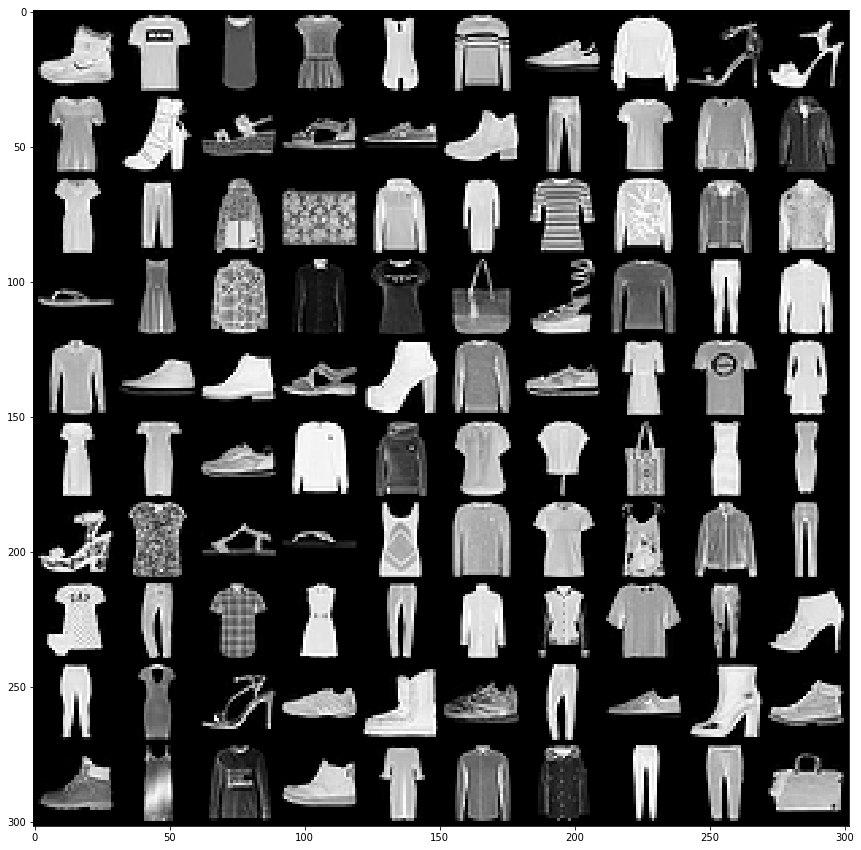

In [164]:
grid = torchvision.utils.make_grid(images, nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))
plt.show()

In [165]:
# Object oriented neural nets 

import torch.nn as nn # how we build custom nns 

# every nn must implement the "forward" method
# when we implement forward we always use functions from the nn.functional package

# Three steps for building an nn
# 1) extended the nn.Module base class
# 2) define layers as class attributes
# 3) implent forward()

class Network(nn.Module):
    
    def __init__(self):
        super(Network, self).init()
        self.layer = None # this is a dummy layer
        
    def forward(self, t):
        t = self.layer # transform it with layer
        return t

In [166]:
class realNetwork(nn.Module):
    
    def __init__(self):
        super(realNetwork, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 6, kernel_size = 5)
        self.conv2 = nn.Conv2d(in_channels = 6, out_channels = 12, kernel_size = 5)
        
        self.fc1 = nn.Linear(in_features = 12*4*4, out_features = 120) # "fully connected". Also, "dense"
        self.fc2 = nn.Linear(in_features = 120, out_features = 60)
        self.out = nn.Linear(in_features = 60, out_features = 10)
        
    def forward(self, t):
        # time to actually implement forward
        return t
    
example_network = realNetwork()

In [167]:
print(example_network)

realNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)


In [168]:
# easy enough. 
# Two types of parameters here

# hyperparameters and data dependent hyperparameters
# HPs are parameters for which values are known that generally work. 

# Learnable parameters are iterated, updated parameters. 

network = realNetwork()

In [169]:
network.conv1.weight
network.conv2.weight.shape
network.fc2.weight.shape # conv layer weights are 4-axis tensors

torch.Size([60, 120])

In [170]:
network.conv2.weight[0] # first filter

tensor([[[ 0.0708,  0.0774, -0.0298,  0.0064,  0.0100],
         [ 0.0480, -0.0371,  0.0069,  0.0571, -0.0460],
         [-0.0278, -0.0318,  0.0034,  0.0395,  0.0618],
         [-0.0278,  0.0284, -0.0303,  0.0547,  0.0709],
         [-0.0795, -0.0595,  0.0457, -0.0621,  0.0676]],

        [[ 0.0714, -0.0106,  0.0166,  0.0469, -0.0039],
         [ 0.0361,  0.0228, -0.0436,  0.0514, -0.0791],
         [ 0.0777, -0.0233, -0.0477,  0.0434, -0.0738],
         [ 0.0454,  0.0630, -0.0654,  0.0559,  0.0410],
         [ 0.0331, -0.0707, -0.0295, -0.0422, -0.0525]],

        [[ 0.0339,  0.0369,  0.0487, -0.0713,  0.0624],
         [ 0.0397, -0.0783, -0.0148, -0.0769,  0.0749],
         [ 0.0094,  0.0574, -0.0634, -0.0553,  0.0093],
         [-0.0781, -0.0433,  0.0507, -0.0119, -0.0325],
         [ 0.0431,  0.0782,  0.0156, -0.0609, -0.0762]],

        [[ 0.0730, -0.0524,  0.0756,  0.0796, -0.0135],
         [ 0.0473,  0.0058, -0.0735, -0.0411,  0.0664],
         [-0.0486, -0.0807, -0.0777, -0.03

In [171]:
for name, param in network.named_parameters():
    print("name: {} \t \t {}".format(name, param.shape))

name: conv1.weight 	 	 torch.Size([6, 1, 5, 5])
name: conv1.bias 	 	 torch.Size([6])
name: conv2.weight 	 	 torch.Size([12, 6, 5, 5])
name: conv2.bias 	 	 torch.Size([12])
name: fc1.weight 	 	 torch.Size([120, 192])
name: fc1.bias 	 	 torch.Size([120])
name: fc2.weight 	 	 torch.Size([60, 120])
name: fc2.bias 	 	 torch.Size([60])
name: out.weight 	 	 torch.Size([10, 60])
name: out.bias 	 	 torch.Size([10])


In [172]:
# interesting - the bias is also a parameter. Each layer has a bias by default. 

fc = nn.Linear(in_features = 4, out_features = 3, bias = True)
# where exactly is the weight matrix?
# lives inside the pytorch Linear Layer class (nn.Linear)
# Automatically creates a 3x4 weight matrix 
# initialized with random values 

fc.in_features

our_in_features = torch.tensor([1,2,3,4], dtype=torch.float32)

In [173]:
fc(our_in_features) # pass our input through linear layer. 

tensor([ 0.0437, -0.4013,  0.2049])

In [174]:
# what about a custom weight matrix?
our_weight_matrix = torch.tensor([
    [1,2,3,4],
    [5,6,7,8],
    [9,10,11,12],
], dtype=torch.float32)

fc.weight = nn.Parameter(our_weight_matrix) # technically, anything we want to pass in as a parameter must be cast as one first

fc(our_in_features) # neat. Teeny little bias has been added. Try flipping that on and off. 

# this is a nice little linear function = output = weights(input) + bias

tensor([ 29.8734,  69.5350, 109.8100])

In [175]:
# alright. Back to implementing the network. 
import torch.nn.functional as F

class Network(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 6, kernel_size = 5)
        self.conv2 = nn.Conv2d(in_channels = 6, out_channels = 12, kernel_size = 5)
        
        self.fc1 = nn.Linear(in_features = 12*4*4, out_features = 120) # "fully connected". Also, "dense"
        self.fc2 = nn.Linear(in_features = 120, out_features = 60)
        self.out = nn.Linear(in_features = 60, out_features = 10)
        
    def forward(self, t):
        # time to actually implement forward, layer by layer
        # 1) input layer
        t = t
        
        # 2) conv1 - 3 operations. Convolution, activation, and pooling. 
        t = self.conv1(t) # that easy - we just call the layer obejct on our input! Neat. 
        t = F.relu(t) # activation function
        t = F.max_pool2d(t, kernel_size = 2, stride = 2) # pool the convolution output 
        
        # 3) conv2
        t = self.conv2(t) # that easy - we just call the layer obejct on our input! Neat. 
        t = F.relu(t) 
        t = F.max_pool2d(t, kernel_size = 2, stride = 2)
        
        # 4) fc1
        t = t.reshape(-1, 12 * 4 * 4) # when we swap from conv to linear, we need to reshape
        # 12 is number of output channels from previous layer
        # 4x4 is height and with of each of the channels, determined by previous pooling operations. 
        t = self.fc1(t)
        t = F.relu(t)
        
        # 5) fc2
        t = self.fc2(t)
        t = F.relu(t)

        # 6) out 
        t = self.out(t)
#         t.softmax(t, dim=1) # change to percentages. Different activation function
        
        return t
    
example_network = Network()

In [181]:
# turn auto graph building feature off
torch.set_grad_enabled(False)

In [182]:
network = Network()
sample = next(iter(train_set))
image, label = sample

In [183]:
print(image.shape)
label

torch.Size([1, 28, 28])


9

In [184]:
# MUST batch before we pass into network
# We can make a batch with just one image easily. We just need to make it into a four-dimensional tensor. 
# just unsqueeze it! 

image.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [188]:
# just what we're looking for. 

pred = network(image.unsqueeze(0))
pred.shape

torch.Size([1, 10])

In [205]:
pred

tensor([[ 0.0403, -0.0795,  0.1241, -0.0804, -0.1281, -0.0057, -0.0020, -0.0083, -0.0602,  0.0646]])

In [207]:
# What we have here is "likeness values" for each of the ten categories of clothing. 
print(pred.argmax(dim=1).item())
softmax1 = F.softmax(pred, dim=1)
softmax1
# note that these probabilities are almost all equal. THat is because our network is untrained, and has an evenly-distrbuted training set. 
# This makes perfect sense. 

2


tensor([[0.1053, 0.0934, 0.1145, 0.0933, 0.0889, 0.1005, 0.1009, 0.1003, 0.0952, 0.1078]])

In [202]:
print("label: {} \t\t value: {}%".format(pred.argmax(dim=1).item(), F.softmax(pred, dim=1).max().item()*100))
# also nice to look at. 

label: 2 		 value: 11.44554689526558%


In [204]:
print(F.softmax(pred, dim=1).sum().item())
# adds up to 1.0. Nice

1.0


In [209]:
# Let's see how a second network compares. 

net_two = Network()
pred_two = net_two(image.unsqueeze(0))
softmax2 = F.softmax(pred_two, dim=1)

print(softmax1)
softmax2


tensor([[0.1053, 0.0934, 0.1145, 0.0933, 0.0889, 0.1005, 0.1009, 0.1003, 0.0952, 0.1078]])


tensor([[0.1055, 0.0911, 0.1001, 0.0900, 0.1080, 0.1138, 0.1069, 0.0940, 0.1001, 0.0905]])

In [212]:
# slightly different. Very good. 

# Let's look a new batch of real images.
batch = next(iter(train_loader))
images, labels = batch
images.shape # 100 images. Proper tensor shape. Nice. 

torch.Size([100, 1, 28, 28])

In [213]:
# back to our first network

batch_pred = network(images)
batch_pred.shape

torch.Size([100, 10])

In [220]:
batch_softmax = F.softmax(batch_pred, dim=1)
batch_softmax

tensor([[0.1053, 0.0934, 0.1145, 0.0933, 0.0889, 0.1005, 0.1009, 0.1003, 0.0952, 0.1078],
        [0.1050, 0.0952, 0.1141, 0.0929, 0.0875, 0.1005, 0.1017, 0.1006, 0.0950, 0.1075],
        [0.1047, 0.0955, 0.1141, 0.0929, 0.0881, 0.1007, 0.1013, 0.1003, 0.0955, 0.1069],
        [0.1051, 0.0953, 0.1140, 0.0929, 0.0882, 0.1006, 0.1017, 0.1004, 0.0951, 0.1068],
        [0.1052, 0.0950, 0.1139, 0.0926, 0.0884, 0.1009, 0.1012, 0.1005, 0.0944, 0.1078],
        [0.1047, 0.0941, 0.1145, 0.0926, 0.0882, 0.1009, 0.1018, 0.1006, 0.0950, 0.1076],
        [0.1051, 0.0935, 0.1159, 0.0926, 0.0886, 0.1006, 0.1000, 0.0998, 0.0958, 0.1081],
        [0.1042, 0.0934, 0.1141, 0.0933, 0.0892, 0.1005, 0.1016, 0.1010, 0.0950, 0.1077],
        [0.1040, 0.0954, 0.1149, 0.0927, 0.0883, 0.1014, 0.1015, 0.1006, 0.0947, 0.1063],
        [0.1043, 0.0946, 0.1150, 0.0920, 0.0889, 0.1015, 0.1011, 0.1005, 0.0959, 0.1061],
        [0.1051, 0.0949, 0.1139, 0.0932, 0.0881, 0.1001, 0.1016, 0.1003, 0.0954, 0.1074],
        [0

In [226]:
i = 0
for pred in batch_softmax:
    i+=1
    print("{}) label: {} \t\t value: {}%".format(i, pred.argmax(dim=0).item(), pred.max().item()*100))
    # thinks everything is 2. Not sure why, but maybe the dataset is just imbalanced there

1) label: 2 		 value: 11.44554689526558%
2) label: 2 		 value: 11.411470919847488%
3) label: 2 		 value: 11.40826940536499%
4) label: 2 		 value: 11.399462074041367%
5) label: 2 		 value: 11.394376307725906%
6) label: 2 		 value: 11.449643969535828%
7) label: 2 		 value: 11.59299910068512%
8) label: 2 		 value: 11.409740149974823%
9) label: 2 		 value: 11.491484194993973%
10) label: 2 		 value: 11.4979587495327%
11) label: 2 		 value: 11.387425661087036%
12) label: 2 		 value: 11.390262097120285%
13) label: 2 		 value: 11.511407792568207%
14) label: 2 		 value: 11.535289138555527%
15) label: 2 		 value: 11.533043533563614%
16) label: 2 		 value: 11.50466725230217%
17) label: 2 		 value: 11.371853947639465%
18) label: 2 		 value: 11.419694870710373%
19) label: 2 		 value: 11.46266683936119%
20) label: 2 		 value: 11.417940258979797%
21) label: 2 		 value: 11.36222630739212%
22) label: 2 		 value: 11.398109048604965%
23) label: 2 		 value: 11.467248946428299%
24) label: 2 		 value: 11.45

In [229]:
batch_pred.argmax(dim=1).eq(labels)

tensor([False, False, False, False, False,  True, False,  True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False, False,  True, False, False, False, False,
        False, False, False, False, False,  True, False, False, False, False, False, False, False,  True, False, False,
        False, False, False, False, False,  True,  True, False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False, False, False,  True, False, False, False,
        False, False, False, False])

In [233]:
def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum() # number of correct guesses

In [234]:
get_num_correct(batch_pred, labels)

tensor(9)